# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip3 install citipy

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval\n_____________________________\n")


responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query + city).json()
    if response ["cod"] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("______________________\nData Retrieval Complete\n_______________________________")



Beginning Data Retrieval
_____________________________

Processing Record 1 | rikitea
Processing Record 2 | lohardaga
Processing Record 3 | longyearbyen
Processing Record 4 | aykhal
Processing Record 5 | arraial do cabo
Processing Record 6 | puerto ayora
Processing Record 7 | jamestown
Processing Record 8 | evanston
Processing Record 9 | clarence town
Processing Record 10 | victoria
City not found. Skipping...
Processing Record 12 | albany
Processing Record 13 | mahalapye
City not found. Skipping...
Processing Record 15 | busselton
Processing Record 16 | moron
Processing Record 17 | saint-philippe
Processing Record 18 | punta arenas
Processing Record 19 | hermanus
Processing Record 20 | bequimao
Processing Record 21 | praia
City not found. Skipping...
Processing Record 23 | grindavik
Processing Record 24 | reconquista
Processing Record 25 | provideniya
Processing Record 26 | oussouye
City not found. Skipping...
Processing Record 28 | pitimbu
Processing Record 29 | plouzane
Processing R

Processing Record 253 | black diamond
Processing Record 254 | sioux lookout
Processing Record 255 | mayo
Processing Record 256 | ustyuzhna
Processing Record 257 | te anau
City not found. Skipping...
Processing Record 259 | souillac
Processing Record 260 | kosjeric
Processing Record 261 | kuryk
Processing Record 262 | oranjemund
Processing Record 263 | price
Processing Record 264 | dingle
Processing Record 265 | shirokiy
Processing Record 266 | dengzhou
Processing Record 267 | fortuna
City not found. Skipping...
Processing Record 269 | lac du bonnet
Processing Record 270 | vardo
Processing Record 271 | general roca
Processing Record 272 | sing buri
Processing Record 273 | abu dhabi
Processing Record 274 | chuy
City not found. Skipping...
Processing Record 276 | litovko
Processing Record 277 | felipe carrillo puerto
Processing Record 278 | lata
Processing Record 279 | altay
Processing Record 280 | ati
Processing Record 281 | gewane
Processing Record 282 | sao filipe
Processing Record 283

Processing Record 506 | kupang
Processing Record 507 | barinas
Processing Record 508 | fort nelson
Processing Record 509 | ishigaki
Processing Record 510 | san joaquin
Processing Record 511 | tutoia
Processing Record 512 | trairi
City not found. Skipping...
Processing Record 514 | nizwa
Processing Record 515 | tigil
Processing Record 516 | yinchuan
Processing Record 517 | diffa
Processing Record 518 | woodstock
Processing Record 519 | berlevag
Processing Record 520 | yar-sale
Processing Record 521 | batticaloa
Processing Record 522 | kloulklubed
Processing Record 523 | tsabong
City not found. Skipping...
City not found. Skipping...
Processing Record 526 | suleja
Processing Record 527 | omsukchan
Processing Record 528 | fort morgan
Processing Record 529 | sosva
Processing Record 530 | omsk
Processing Record 531 | cururupu
City not found. Skipping...
Processing Record 533 | hualmay
Processing Record 534 | wattegama
Processing Record 535 | bo phloi
Processing Record 536 | cabedelo
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Make lists
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
# Get stuff to list
for res in responses:
    city_list.append(res['name'])
    cloudiness_list.append(res['clouds']['all'])
    country_list.append(res['sys']['country'])
    date_list.append(res['dt'])
    humidity_list.append(res['main']['humidity'])
    lat_list.append(res['coord']['lat'])
    lng_list.append(res['coord']['lon'])
    max_temp_list.append(res['main']['temp_max'])
    wind_speed_list.append(res['wind']['speed'])
    
# Create dictonary for df    
city_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list}
    
# Create df
cities_df = pd.DataFrame(city_dict)

cities_df.to_csv(output_data_file, index=False)

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,6,PF,1607548880,77,-23.12,-134.97,77.50,15.95
1,Lohārdagā,0,IN,1607548881,54,23.43,84.68,57.76,2.68
2,Longyearbyen,75,SJ,1607548881,79,78.22,15.64,26.60,8.05
3,Aykhal,0,RU,1607548881,58,66.00,111.50,-40.00,4.47
4,Arraial do Cabo,75,BR,1607548881,94,-22.97,-42.03,75.20,10.29


In [24]:
cities_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000
mean,52.179775,1.607549e+09,73.591760,20.926816,17.712397,51.996273,7.710768
std,39.253607,6.250455e+01,20.797649,33.263275,91.613863,28.854621,5.387212
min,0.000000,1.607548e+09,9.000000,-54.800000,-179.170000,-40.680000,0.360000
25%,9.000000,1.607549e+09,64.250000,-5.080000,-65.332500,33.800000,3.627500
50%,60.000000,1.607549e+09,79.000000,24.745000,18.825000,60.800000,6.710000
75%,90.000000,1.607549e+09,88.000000,49.270000,102.330000,76.275000,10.290000
max,100.000000,1.607549e+09,100.000000,78.220000,178.420000,93.990000,40.260000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [40]:
#  Get the indices of cities that have humidity over 100%.


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,6,PF,1607548880,77,-23.12,-134.97,77.50,15.95
1,Lohārdagā,0,IN,1607548881,54,23.43,84.68,57.76,2.68
2,Longyearbyen,75,SJ,1607548881,79,78.22,15.64,26.60,8.05
3,Aykhal,0,RU,1607548881,58,66.00,111.50,-40.00,4.47
4,Arraial do Cabo,75,BR,1607548881,94,-22.97,-42.03,75.20,10.29
...,...,...,...,...,...,...,...,...,...
529,Meadow Lake,20,US,1607548941,16,34.80,-106.54,55.99,3.67
530,Shingū,14,JP,1607548941,82,33.73,135.98,46.99,5.55
531,Tambopata,40,PE,1607548942,62,-12.73,-69.18,89.60,8.05
532,Ballina,40,AU,1607548942,94,-28.87,153.57,72.00,3.62


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [41]:
cities_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,6,PF,1607548880,77,-23.12,-134.97,77.50,15.95
1,Lohārdagā,0,IN,1607548881,54,23.43,84.68,57.76,2.68
2,Longyearbyen,75,SJ,1607548881,79,78.22,15.64,26.60,8.05
3,Aykhal,0,RU,1607548881,58,66.00,111.50,-40.00,4.47
4,Arraial do Cabo,75,BR,1607548881,94,-22.97,-42.03,75.20,10.29
...,...,...,...,...,...,...,...,...,...
529,Meadow Lake,20,US,1607548941,16,34.80,-106.54,55.99,3.67
530,Shingū,14,JP,1607548941,82,33.73,135.98,46.99,5.55
531,Tambopata,40,PE,1607548942,62,-12.73,-69.18,89.60,8.05
532,Ballina,40,AU,1607548942,94,-28.87,153.57,72.00,3.62


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

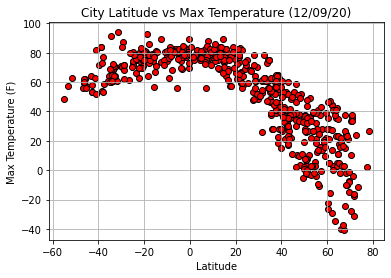

In [43]:
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values, y_values, color='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs Max Temperature (12/09/20)')
plt.savefig('output_data/City_LatVsTemp.png')

## Latitude vs. Humidity Plot

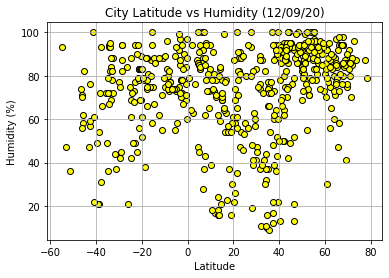

In [44]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values, y_values, color='yellow', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs Humidity (12/09/20)')
plt.savefig('output_data/City_LatVsHumidity.png')

## Latitude vs. Cloudiness Plot

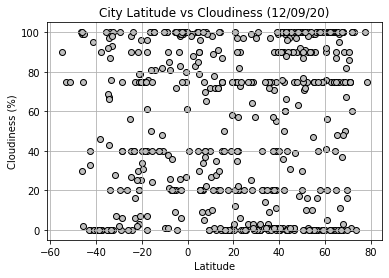

In [45]:
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values, y_values, color='silver', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs Cloudiness (12/09/20)')
plt.savefig('output_data/City_LatVsCloudiness.png')

## Latitude vs. Wind Speed Plot

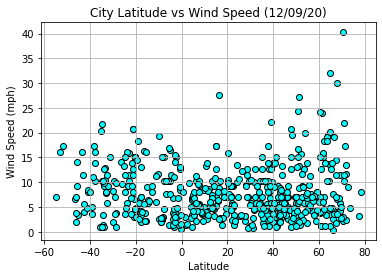

In [46]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values, y_values, color='cyan', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs Wind Speed (12/09/20)')
plt.savefig('output_data/City_LatVsWindspeed.png')

## Linear Regression

In [49]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)
    
# Seperate Hemispheres
north_hem_df = cities_df.loc[cities_df['Lat'] > 0, :]
south_hem_df = cities_df.loc[cities_df['Lat'] < 0, :]
#north_hem_df
#south_hem_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Lohārdagā,0,IN,1607548881,54,23.43,84.68,57.76,2.68
2,Longyearbyen,75,SJ,1607548881,79,78.22,15.64,26.60,8.05
3,Aykhal,0,RU,1607548881,58,66.00,111.50,-40.00,4.47
6,Jamestown,90,US,1607548881,95,42.10,-79.24,35.01,9.17
7,Evanston,20,US,1607548863,50,42.04,-87.69,53.60,6.93
...,...,...,...,...,...,...,...,...,...
527,Margate,100,GB,1607548941,89,51.38,1.39,44.01,1.99
528,Sept-Îles,77,CA,1607548823,73,50.20,-66.38,26.60,1.12
529,Meadow Lake,20,US,1607548941,16,34.80,-106.54,55.99,3.67
530,Shingū,14,JP,1607548941,82,33.73,135.98,46.99,5.55


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8478632319064853


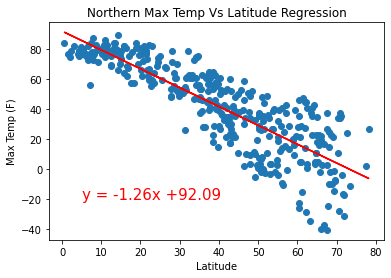

In [64]:
linear_reg_plot(north_hem_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp (F)', 'output_data/NorthTempVsLat.png', (5,-20)) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.606767377780121


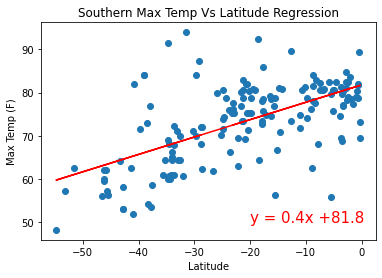

In [63]:
linear_reg_plot(south_hem_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp (F)', 'output_data/SouththTempVsLat.png', (-20,50)) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2972209254980437


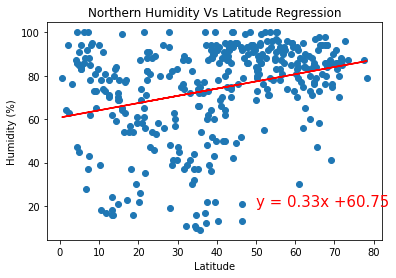

In [55]:
linear_reg_plot(north_hem_df, 'Northern Humidity Vs Latitude Regression', 'Humidity', 'Humidity (%)', 'output_data/NorthHumidityVsLat.png', (50,20)) 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3241876790168671


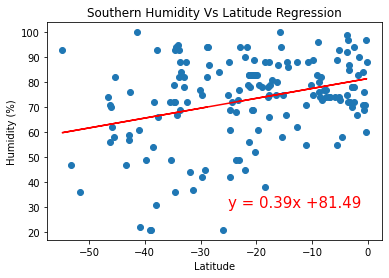

In [67]:
linear_reg_plot(south_hem_df, 'Southern Humidity Vs Latitude Regression', 'Humidity', 'Humidity (%)', 'output_data/SouthHumidityVsLat.png', (-25,30)) 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15518737487427967


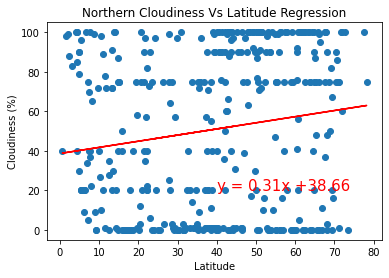

In [57]:
linear_reg_plot(north_hem_df, 'Northern Cloudiness Vs Latitude Regression', 'Cloudiness', 'Cloudiness (%)', 'output_data/NorthCloudinessVsLat.png', (40,20)) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22987872964037595


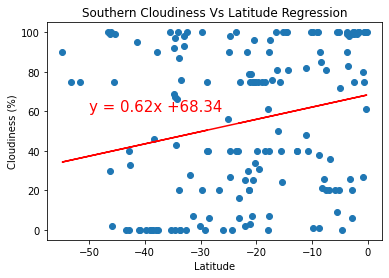

In [68]:
linear_reg_plot(south_hem_df, 'Southern Cloudiness Vs Latitude Regression', 'Cloudiness', 'Cloudiness (%)', 'output_data/southCloudinessVsLat.png', (-50,60)) 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16712398902168293


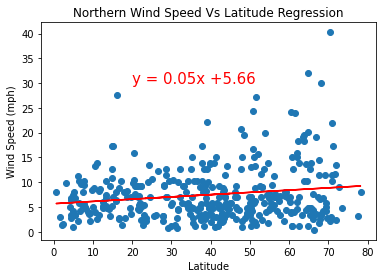

In [60]:
linear_reg_plot(north_hem_df, 'Northern Wind Speed Vs Latitude Regression', 'Wind Speed', 'Wind Speed (mph)', 'output_data/NorthWindVsLat.png', (20,30)) 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13847948818798264


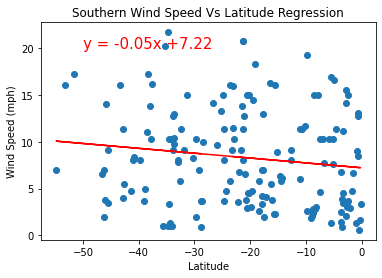

In [70]:
linear_reg_plot(south_hem_df, 'Southern Wind Speed Vs Latitude Regression', 'Wind Speed', 'Wind Speed (mph)', 'output_data/SouthWindVsLat.png', (-50,20)) 